In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from figures import make_world
from numba import njit

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [2]:
#@njit("i1[:,:](i1[:,:])", nogil=True)
@njit
def next_gen(world):
    
    height, width = world.shape 
    new_world = np.zeros((height, width), np.int8)
    count = 0
    
    for i in range(height): 
        for j in range(width):
            
            cell = world[i][j]
            count = count + 1 if cell else count
            
            neighbours_count = np.array([
                    world[i_r][j_r]
                    for i_r in ((i-1)%height, i, (i+1)%height) 
                    for j_r in ((j-1)%width, j, (j+1)%width)
            ]).sum() - cell
            
            if cell and neighbours_count in (2, 3):
                new_world[i][j] = 1
                
            elif (not cell) and neighbours_count == 3:
                new_world[i][j] = 1
            
    return new_world, count

def game(time,seed='default'):
    width, height = 100, 50
    space = height*width
    density = [] # a density matrix for the plot
    
    world = make_world(seed,width=width,height=height,pixel=1)
    
    for i in range(time):
        world,count = next_gen(world)
        density.append(count/space)
        
    return np.array(density)
    

Plotting three game of life simulations

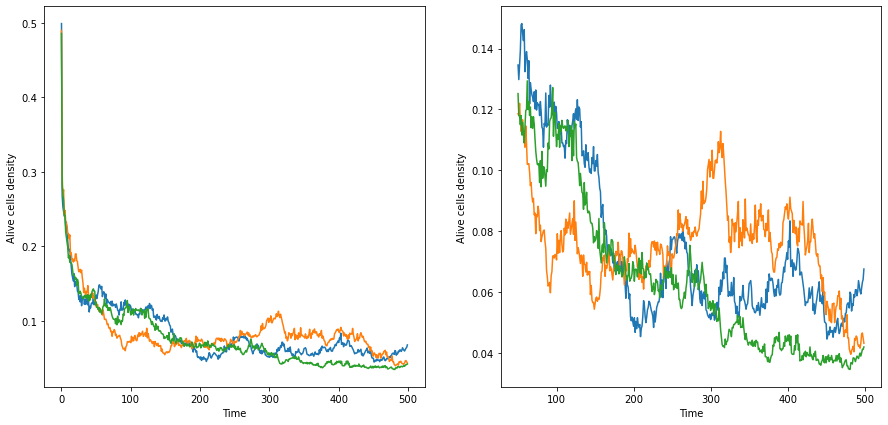

In [3]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

for i in range(3):
    ev = game(500)
    ax[0].plot(np.arange(len(ev)),ev)
    ax[1].plot(np.arange(len(ev))[50:],ev[50:])
for i in range(2):
    ax[i].set_ylabel('Alive cells density')
    ax[i].set_xlabel('Time')

plt.show()

Plotting an example of interesting figure

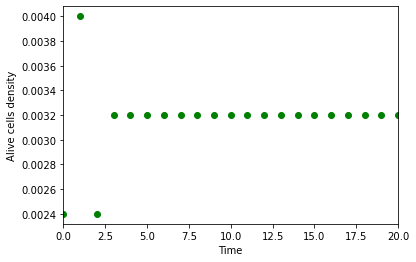

In [4]:
ev = game(200,seed='replicator')
plt.xlim([0,20])
plt.plot(np.arange(len(ev)),ev,'go')
plt.ylabel('Alive cells density')
plt.xlabel('Time')

plt.show()

The following plot show how long it takes for the world to converge 

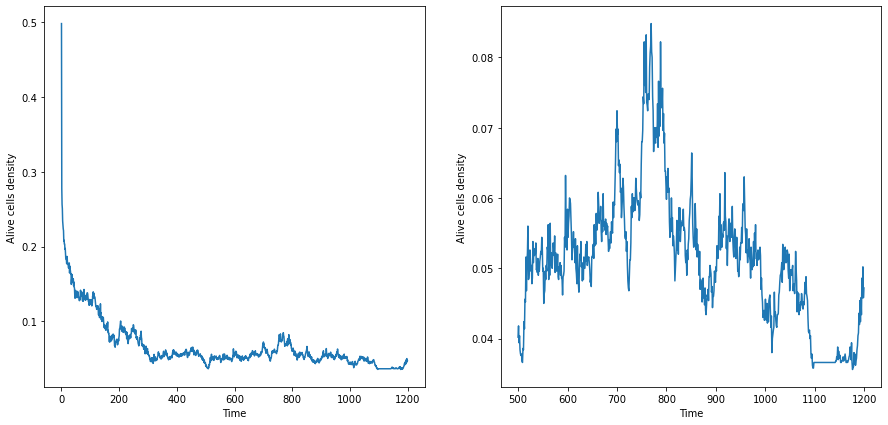

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

for i in range(1):
    ev = game(1200)
    ax[0].plot(np.arange(len(ev)),ev)
    ax[1].plot(np.arange(len(ev))[500:],ev[500:])
for i in range(2):
    ax[i].set_ylabel('Alive cells density')
    ax[i].set_xlabel('Time')

plt.show()

We can start a simulation that end when density population fluctuations are smaller than 0.01%

In [6]:
def game_to_convergence(dim,seed='default'):
    width, height = dim, dim
    space = height*width
    density = []
    
    world = make_world(seed,width,height,1)
    run = True
    
    while run:
        world,count = next_gen(world)
        density.append(count/space)
        
        if (len(density)>2) and (abs(density[-1]-density[-2]) < .0001):
            run = False
        
    return np.array(density)

Now we can show the relation between the dimension of the world and time of convergence of the world. There is a clear relation, however fluctuations are bigger

In [7]:
dimension = []
time_to_conv = []

for i in range(1,200):
    print('simulation',i)
    simul = game_to_convergence(i)
    dimension.append(i*i)
    time_to_conv.append(len(simul))

simulation 1
simulation 2
simulation 3
simulation 4
simulation 5
simulation 6
simulation 7
simulation 8
simulation 9
simulation 10
simulation 11
simulation 12
simulation 13
simulation 14
simulation 15
simulation 16
simulation 17
simulation 18
simulation 19
simulation 20
simulation 21
simulation 22
simulation 23
simulation 24
simulation 25
simulation 26
simulation 27
simulation 28
simulation 29
simulation 30
simulation 31
simulation 32
simulation 33
simulation 34
simulation 35
simulation 36
simulation 37
simulation 38
simulation 39
simulation 40
simulation 41
simulation 42
simulation 43
simulation 44
simulation 45
simulation 46
simulation 47
simulation 48
simulation 49
simulation 50
simulation 51
simulation 52
simulation 53
simulation 54
simulation 55
simulation 56
simulation 57
simulation 58
simulation 59
simulation 60
simulation 61
simulation 62
simulation 63
simulation 64
simulation 65
simulation 66
simulation 67
simulation 68
simulation 69
simulation 70
simulation 71
simulation 72
s

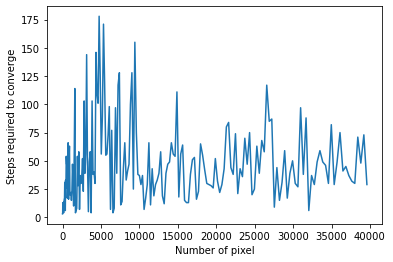

In [8]:
dimension = np.array(dimension)

plt.plot(dimension,time_to_conv)#,'o',alpha=.5)
plt.xlabel('Number of pixel')
plt.ylabel('Steps required to converge')

plt.show()

Clearly most of the simulation converge in smaller time

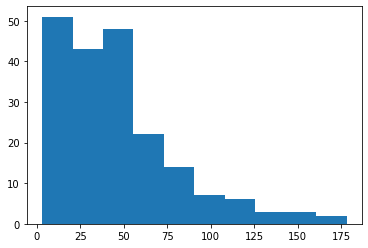

In [9]:
plt.hist(time_to_conv)
plt.show()

Now we want to show the relation between dimensions and time of convergence averaging over different simulation

simulation 3
simulation 4
simulation 5
simulation 6
simulation 7
simulation 8
simulation 9
simulation 10
simulation 11
simulation 12
simulation 13
simulation 14
simulation 15
simulation 16
simulation 17
simulation 18
simulation 19
simulation 20
simulation 21
simulation 22
simulation 23
simulation 24
simulation 25
simulation 26
simulation 27
simulation 28
simulation 29
simulation 30
simulation 31
simulation 32
simulation 33
simulation 34
simulation 35
simulation 36
simulation 37
simulation 38
simulation 39
simulation 40
simulation 41
simulation 42
simulation 43
simulation 44
simulation 45
simulation 46
simulation 47
simulation 48
simulation 49


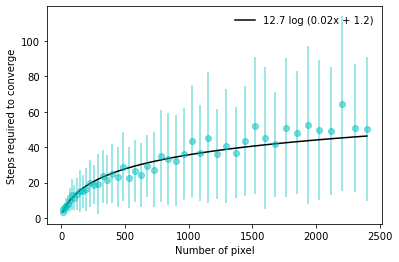

In [12]:
dimension = []
time_to_conv = []
time_std = []

for i in range(3,50):
    print('simulation',i)
    time = []
    for j in range(50):
        simul = game_to_convergence(i)
        time.append(len(simul))
    dimension.append(i*i)
    time_to_conv.append(np.mean(time))
    time_std.append(np.std(time))
    
dimension = np.array(dimension)

plt.errorbar(dimension,time_to_conv,yerr=time_std,fmt='co',alpha=.5)
plt.xlabel('Number of pixel')
plt.ylabel('Steps required to converge')

# Interpolation
def f(x,a,b,c):
    return a*np.log(b*x+c)

param,_ = optimize.curve_fit(f, dimension, time_to_conv, sigma=time_std, p0=[14.3,.01,1.2])
plt.plot(dimension,f(dimension,param[0],param[1],param[2]),'-k',
         label='{:.1f} log ({:.2f}x + {:.1f})'.format(param[0],param[1],param[2]))
plt.legend(frameon=False)

plt.show()